In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("allWorkouts.csv")
pd.Series(df["Type"]).unique()

array(['Outdoor Running', 'Skating Sports', 'Hiking', 'Outdoor Cycling',
       'Outdoor Walking', 'Pool Swimming', 'Functional Strength Training',
       'Open Water Swimming', 'Traditional Strength Training', 'Yoga',
       'Indoor Cycling'], dtype=object)

In [6]:
df["Distance"] = df["Distance"].dropna()
df["Distance"] = df.apply(lambda x: float(x["Distance"].replace(",",".")))

KeyError: 'Distance'

In [54]:
dfDistance

0      13.460011
1      10.652094
2       9.120132
3       9.545054
4      13.628711
         ...    
353     4.237123
354    11.670295
357     5.291305
358     7.196050
359     7.547212
Name: Distance, Length: 313, dtype: float64

In [78]:
df["Type"].value_counts().values

array([242,  47,  21,  17,  13,  11,   3,   2,   2,   2,   1])

<AxesSubplot:ylabel='Type'>

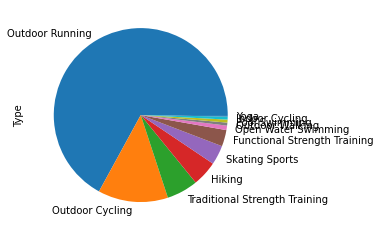

In [76]:
df["Type"].value_counts().plot.pie()

In [87]:
pie_values = df["Type"].value_counts().values
pie_index = df["Type"].value_counts().index
category_values = pie_values[pie_values > 10]
category_index = pie_index[:len(category_values)]
other_values = pie_values[pie_values <= 10]

In [92]:
category_index.values

array(['Outdoor Running', 'Outdoor Cycling',
       'Traditional Strength Training', 'Hiking', 'Skating Sports',
       'Functional Strength Training'], dtype=object)

In [89]:
len(pie_index)

11

In [91]:
np.sum(other_values)

10

In [131]:
def convertPool(x, y):
    if x == "Pool Swimming":
        y /= 1000
    return y

df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])
df["Distance"] =  df.apply(lambda x: convertPool(x["Type"], x["Distance"]), axis=1)

In [133]:
df_per_month = df.groupby(pd.Grouper(key="Start",freq='M')).sum()

<AxesSubplot:ylabel='km'>

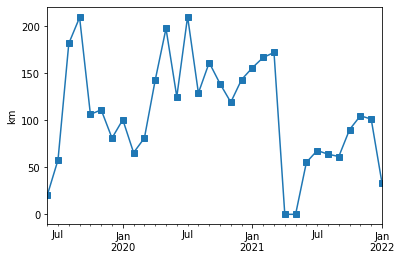

In [134]:
df_per_month["Distance"].plot(x="Start", marker="s", xlabel="", ylabel="km")

In [129]:
test

,Distance,Average Cadence,Elevation Descended,Weather Humidity
Start,,,,
2019-06-30,20.034566,0.0,0.0,139.0
2019-07-31,57.820557,0.0,0.0,515.0
2019-08-31,181.660767,0.0,0.0,1434.0
2019-09-30,209.314218,0.0,0.0,898.0
2019-10-31,106.307361,0.0,0.0,984.0
2019-11-30,111.094338,0.0,0.0,819.0
2019-12-31,81.071869,0.0,0.0,617.0
2020-01-31,100.591952,0.0,0.0,750.0
2020-02-29,65.577506,0.0,0.0,463.0


In [7]:
df

,Type,Start,End,Duration,Distance,Average Heart Rate,Max Heart Rate,Average Pace,Average Speed,Average Cadence,Active Energy,Total Energy,Elevation Ascended,Elevation Descended,Weather Temperature,Weather Humidity
0,Outdoor Running,2022-01-10 13:11,2022-01-10 14:24,1:12:18,"13,460010942174122","163,36960113287702",175,0:05:22,"11,167621804814958",NaN,"974,2399999999989","1108,2950000000017","266,78000000000003",NaN,"3,9999998940362502",82.0
1,Outdoor Running,2022-01-08 10:45,2022-01-08 11:45,1:00:22,"10,652094098217786","150,5672613990371",190,0:05:40,"10,587382922607722",NaN,"693,4950000000009","807,5860000000031","75,17",NaN,"0,999999973509091",96.0
2,Outdoor Running,2022-01-04 13:50,2022-01-04 14:38,0:48:42,"9,120131564199925","145,80182392143107",160,0:05:20,"11,235771683264772",NaN,"584,859999999999","681,3770000000004","26,21",NaN,"5,9999998410543185",93.0
3,Outdoor Running,2021-12-31 12:32,2021-12-31 13:20,0:48:31,"9,545053896639496","155,55649419218585",166,0:05:04,"11,803589369666515",NaN,"615,610999999998","710,5559999999994","30,2",NaN,"11,99999968210858",87.0
4,Outdoor Running,2021-12-30 15:49,2021-12-30 16:57,1:08:28,"13,628711377449333","170,8885564697083",183,0:05:01,"11,941623771955175",NaN,"988,1589999999992","1116,3950000000018","260,42",NaN,"15,999999576144774",81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Indoor Cycling,2019-07-04 13:10,2019-07-04 13:15,0:04:51,NaN,"123,63793103448276",136,NaN,NaN,NaN,"40,991","49,08399999999998",NaN,NaN,"22,77777777777783",32.0
357,Outdoor Running,2019-06-30 08:05,2019-06-30 08:34,0:28:37,"5,291304678113549","155,8604223247674","165,7707006915314",0:05:24,"11,093852404503297",NaN,"353,9440000000001","419,599","22,88",NaN,"21,111111111111143",60.0
358,Outdoor Cycling,2019-06-29 18:10,2019-06-29 18:40,0:30:15,"7,196049778406606","104,52859355963194","106,47115821578456",0:04:12,"14,271118739999018",NaN,"182,82599999999996","243,8409999999999","96,37",NaN,"31,666666666666686",25.0
359,Outdoor Cycling,2019-06-29 15:05,2019-06-29 15:39,0:33:55,"7,547211819854368","108,77999512573801","114,5772572723838",0:04:29,"13,349353754679777",NaN,"167,52400000000003","240,25799999999998","22,04",NaN,"31,666666666666686",27.0
